In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import pickle as pkl
import sys 
sys.path.append("../models/") 
from functions import plot_style
import numpy as np
colors = plot_style("../fonts/Encode_Sans_Condensed/")
import warnings
warnings.filterwarnings("ignore")

countries = np.array(['Indonesia', 'Bolivia', 'Morocco', 'Bangladesh', 'Sri-Lanka', 'Kenya', 'Mozambique',
                      "Afghanistan", "Cote-dIvoire", "Pakistan", "El-Salvador", "Kyrgyzstan",
                      "Philippines", "Uganda", "Egypt", "Rwanda", "Zambia", "Angola", "Ghana", "Honduras"])

income = {'Indonesia': "LMI", 
          'Bolivia': "LMI", 
          'Morocco': "LMI", 
          'Bangladesh': "LMI", 
          'Sri-Lanka': "LMI", 
          'Kenya': "LMI", 
          'Mozambique': "LI",
          "Afghanistan": "LI", 
          "Cote-dIvoire": "LMI", 
          "Pakistan": "LMI", 
          "El-Salvador": "LMI", 
          "Kyrgyzstan": "LMI",
          "Philippines": "LMI", 
          "Uganda": "LI", 
          "Egypt": "LMI",
          "Rwanda": "LI", 
          "Zambia": "LI", 
          "Angola": 'LMI', 
          "Ghana": "LMI", 
          "Honduras": "LMI"}

npis = np.arange(0.05, 1.0, 0.05)
weeks = np.arange(4, 44, 4)

# import data 
with open("./output_npis/averted_deaths_npis.pkl", "rb") as file:
    averted_deaths = pkl.load(file)

with open("./output_npis/averted_deaths_npis_CI.pkl", "rb") as file:
    averted_deaths_CI = pkl.load(file)

def get_npis_levels(weeks_idx):
    npis_levels = []
    for country in countries:
        level_us = averted_deaths[country]["us_rescale"]
        npis_levels.append(100 * npis[np.argmin(np.abs(averted_deaths[country]["npis"][:, weeks_idx] - level_us))])
    return npis_levels


who_regions = {'Africa': np.array(["Cote-dIvoire", 'Uganda', 'Ghana', 'Kenya', 'Rwanda', 'Angola', 'Zambia', 'Mozambique']), 
              'Americas': np.array(["El-Salvador","Honduras",'Bolivia']), 
              'Eastern Mediterranean': np.array(['Morocco', 'Egypt', 'Afghanistan', 'Pakistan']), 
              'Europe': np.array(["Kyrgyzstan"]), 
              'South-East Asia': np.array(["Philippines"]), 
              'Western Pacific': np.array(["Bangladesh", 'Sri-Lanka', 'Indonesia'])}


../models/functions.py:286: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [2]:
run_npis_levels = False
npis_levels_med, npis_levels_q1, npis_levels_q2 = {}, {}, {}

if run_npis_levels:
    weeks_idx = 3
    npis_levels_total, npis_levels_med, npis_levels_q1, npis_levels_q2 = {}, {}, {}, {}
    for country in countries:    
        npis_levels = []
        for i in range(1000):
            npis_levels.append(100 * npis[np.argmin(np.abs(averted_deaths_CI[country]["npis"][:, weeks_idx][:, i] - averted_deaths_CI[country]["us_rescale"][i]))])
        npis_levels_total[country] = npis_levels
    with open("./output_npis/npis_levels_total.pkl", "wb") as file:
        pkl.dump(npis_levels_total, file)

else:
    with open("./output_npis/npis_levels_total.pkl", "rb") as file:
        npis_levels_total = pkl.load(file)
    for country in countries:    
        npis_levels_med[country] = np.quantile(npis_levels_total[country], q=0.5)
        npis_levels_q1[country] = np.quantile(npis_levels_total[country], q=0.25)
        npis_levels_q2[country] = np.quantile(npis_levels_total[country], q=0.75)


In [3]:
def point_plot(ax, pos, med, color, marker):
    ax.scatter([pos], [med], color=color, s=100, edgecolor='white', linewidth=0.7, zorder=1, marker=marker)

def plot_bar(ax, pos, med, q1, q2, color, marker):
    ax.scatter([pos], [med], color=color, s=80, edgecolor='white', linewidth=3.2, zorder=10, marker="_")
    ax.scatter([pos], [med], color="white", s=80, linewidth=4.5, zorder=2, marker="_")
    ax.plot([pos, pos], [q1, q2], color=color, solid_capstyle='round', linewidth=8, alpha=0.5, zorder=-1)

def scatter_plot(ax, start_i, countries_grp, npis_levels_med, npis_levels_q1, npis_levels_q2):

    # plot  
    med, q1, q2 = [npis_levels_med[c] for c in countries_grp], \
                  [npis_levels_q1[c] for c in countries_grp], \
                  [npis_levels_q2[c] for c in countries_grp]
    
    idx = np.argsort(med)

    for i in range(len(idx)):
        if income[countries_grp[idx[i]]] == "LMI":
            col = '#DD6E42'
        elif income[countries_grp[idx[i]]] == "LI":
            col = '#FFC857'
        plot_bar(ax, start_i + i, med[idx[i]], q1[idx[i]], q2[idx[i]], col, "o")

    ax.set_ylabel("Additional NPIs (%)",  fontsize=8)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.yaxis.grid(True, color='grey', linewidth=0.1, zorder=-1, linestyle="--")
    ax.set_axisbelow(True)
    ax.tick_params(axis="y", labelsize=8)
    
    return countries_grp[idx]

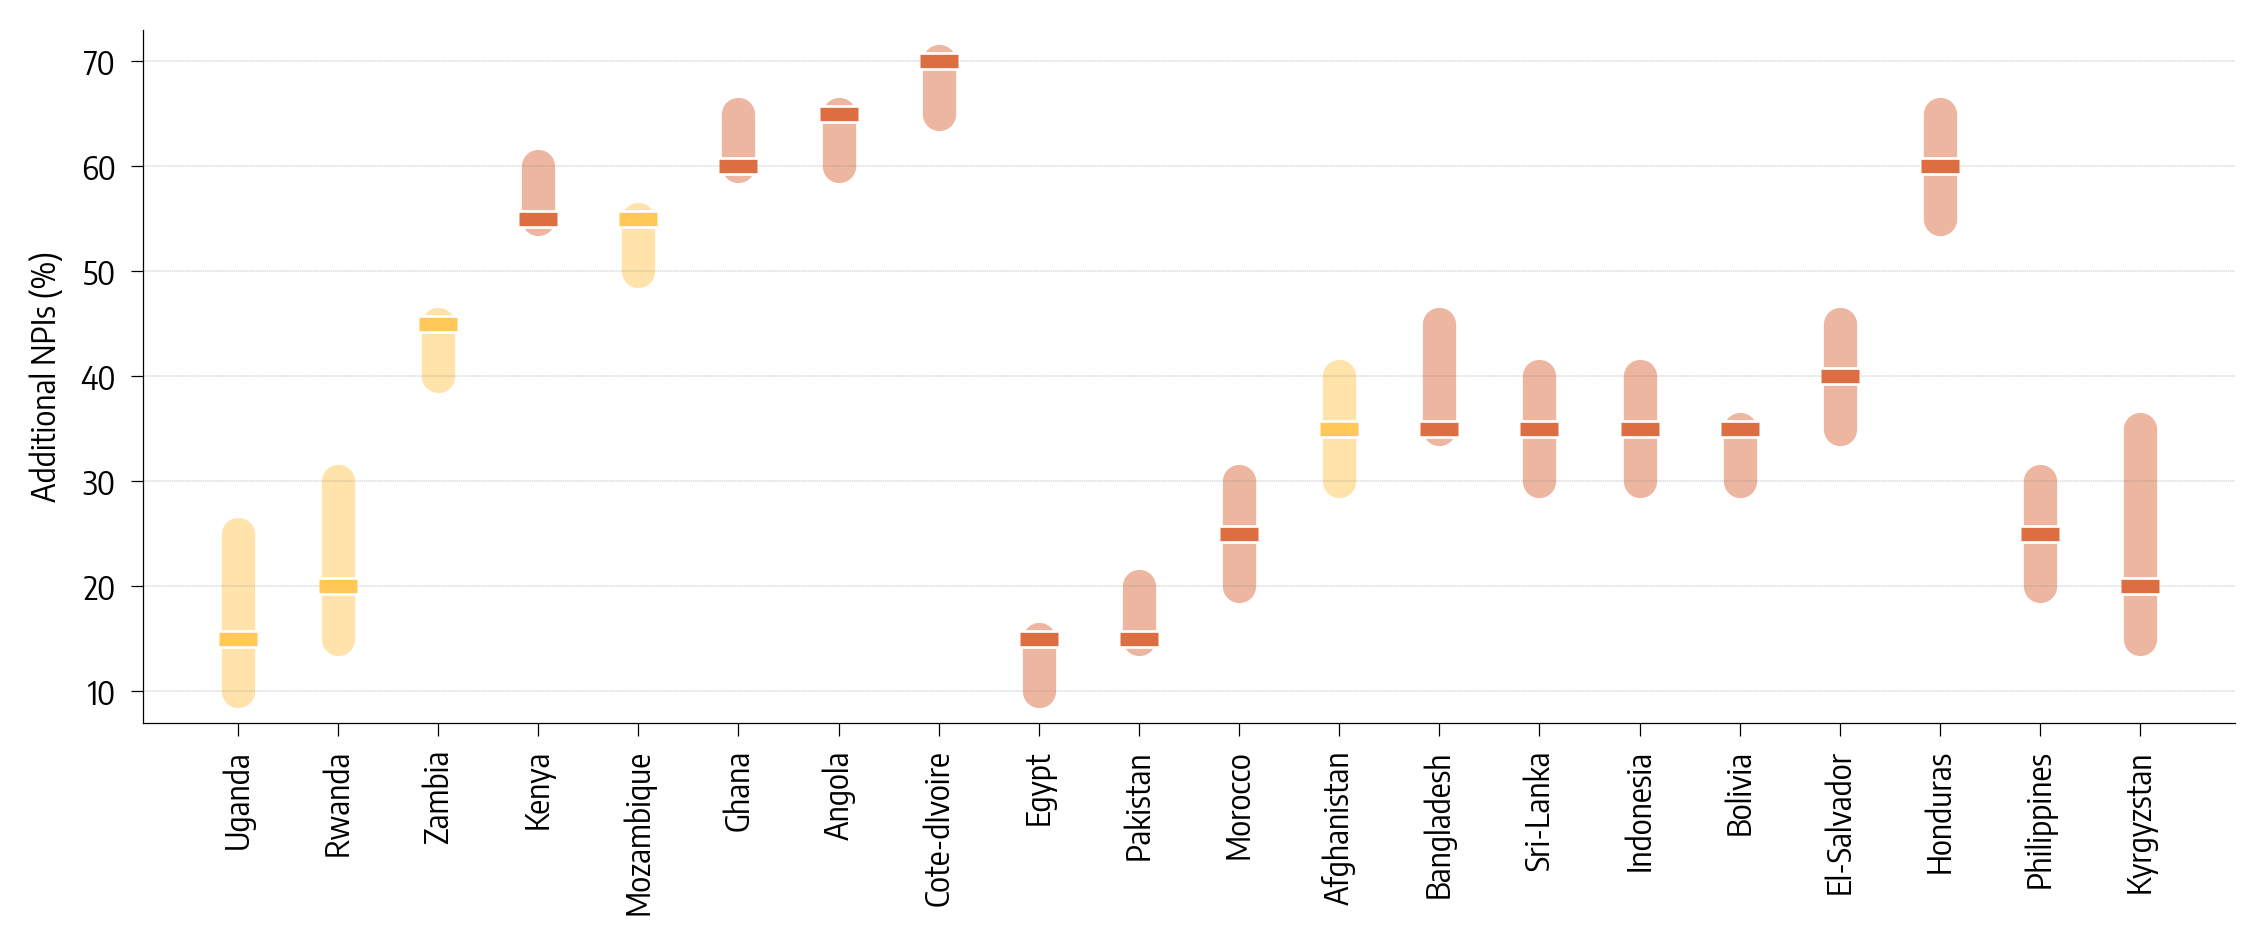

In [4]:
countries_ticks = []
fig, ax = plt.subplots(dpi=300, figsize=(9,3))

cc = scatter_plot(ax, 0, who_regions['Africa'], npis_levels_med, npis_levels_q1, npis_levels_q2)
countries_ticks.extend(cc)

cc = scatter_plot(ax, len(who_regions['Africa']), who_regions['Eastern Mediterranean'], npis_levels_med, npis_levels_q1, npis_levels_q2)
countries_ticks.extend(cc)

cc = scatter_plot(ax, len(who_regions['Africa']) + len(who_regions['Eastern Mediterranean']), 
                  who_regions['Western Pacific'], npis_levels_med, npis_levels_q1, npis_levels_q2)
countries_ticks.extend(cc)

cc = scatter_plot(ax, len(who_regions['Africa']) + len(who_regions['Western Pacific']) + len(who_regions['Eastern Mediterranean']),
                  who_regions['Americas'], npis_levels_med, npis_levels_q1, npis_levels_q2)
countries_ticks.extend(cc)

cc = scatter_plot(ax, len(who_regions['Africa']) + len(who_regions['Western Pacific']) + len(who_regions['Eastern Mediterranean']) + len(who_regions['Americas']), 
                  who_regions['South-East Asia'], npis_levels_med, npis_levels_q1, npis_levels_q2)
countries_ticks.extend(cc)

cc = scatter_plot(ax, len(who_regions['Africa']) + len(who_regions['Western Pacific']) + len(who_regions['Eastern Mediterranean']) + len(who_regions['Americas']) + len(who_regions['South-East Asia']), 
                  who_regions['Europe'], npis_levels_med, npis_levels_q1, npis_levels_q2)
countries_ticks.extend(cc)

ax.set_xticks(range(20))
ax.set_xticklabels(countries_ticks, rotation=90, size=8);

plt.savefig("./img/additional_NPIs_grp.pdf", bbox_inches='tight')


In [5]:
def plot_contourf(ax, country, legend=True):

    levels = np.arange(0, 110, 10)
    
    level_us = averted_deaths[country]["us_rescale"]     
    im = ax.contourf(averted_deaths[country]["npis"], origin='lower', interpolation="gaussian", extend="neither",
                    levels=levels, alpha=0.8, 
                    vmin=0, vmax=100, cmap=sns.diverging_palette(220, 20, as_cmap=True))
    ymin, ymax = ax.get_ylim()
    xmin, xmax = ax.get_xlim()
    
    print("{0}: {1}".format(country, level_us))
    ax.contour(averted_deaths[country]["npis"], levels=[level_us], interpolation="gaussian", linestyles=['--'],
               colors=["red"], extent=[xmin, xmax, ymin, ymax], label="Deaths averted with US vax rates")

    ax.set_ylim(ymin, ymax)
    ax.set_xlim(xmin, xmax)
    ax.set_xticks(0.5 + np.arange(0,len(weeks)))
    ax.set_yticks(0.5 + np.arange(0,len(npis),2))
    ax.set_xticklabels([str(d) for d in weeks], fontsize=10);
    ax.set_yticklabels([str(int(100 * npis[i])) + "%" for i in np.arange(0,len(npis),2)], fontsize=10)
    ax.set_title(country, fontsize=10)

    ax.set_xlabel("Length NPIs (weeks)")
    ax.set_ylabel("Additional NPIs (%)")

    if legend:
        custom_lines = [Line2D([0], [0], color="red", lw=1, linestyle="--")]
        l = ax.legend(custom_lines, ['Vax rates as US'], ncol=3, frameon=False)
        for text in l.get_texts():
            text.set_color("white")

Pakistan: 71.60787425540514


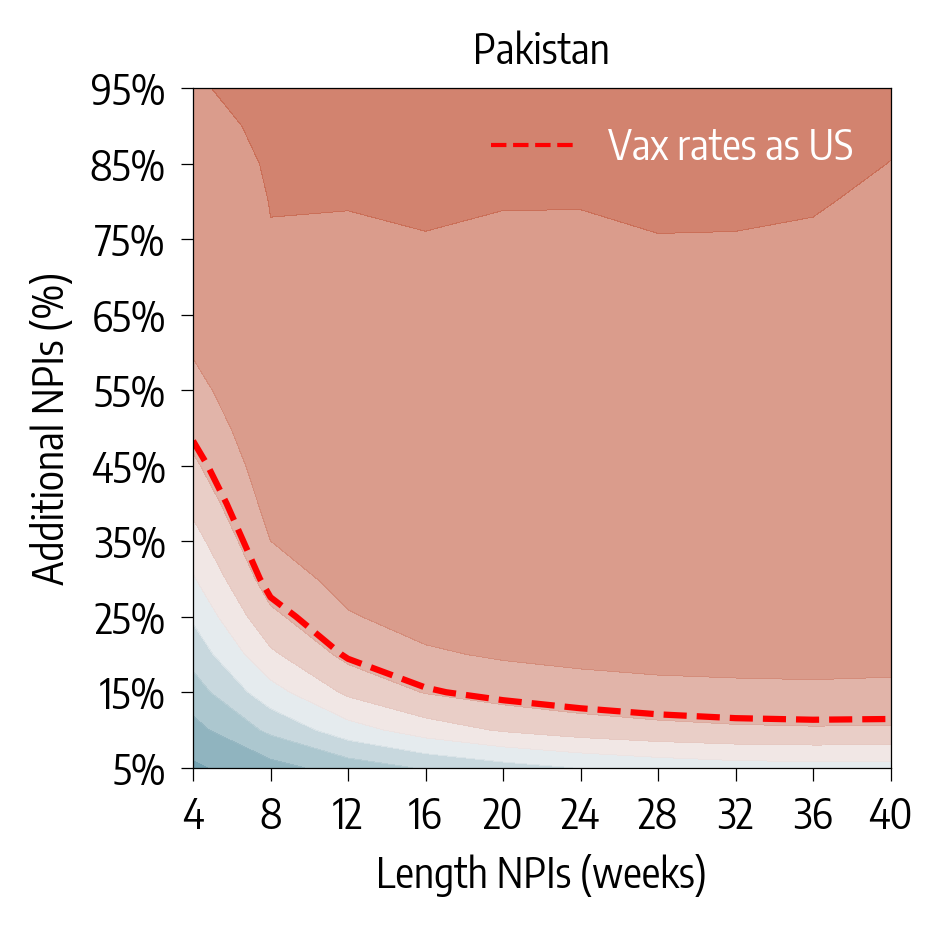

In [6]:
fig, ax = plt.subplots(dpi=300, figsize=(3,3))
plot_contourf(ax, "Pakistan")
plt.savefig("./img/pakistan.pdf", bbox_inches="tight")


Philippines: 79.23669268486569


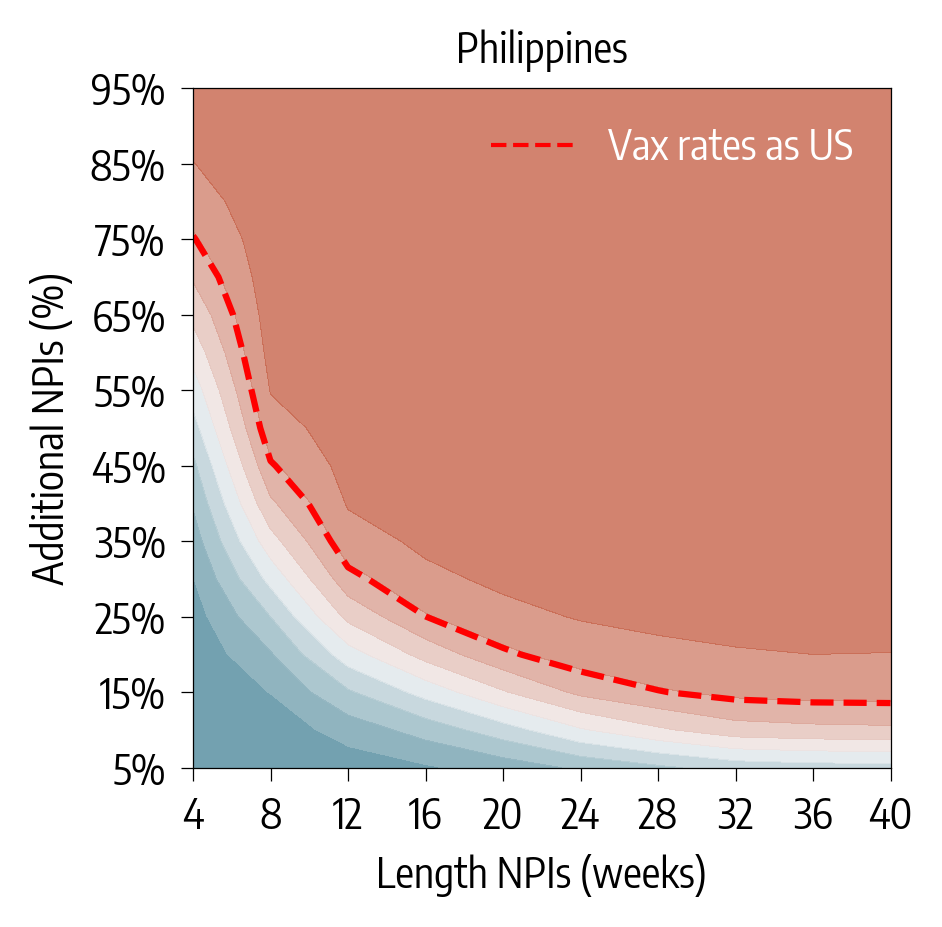

In [7]:
fig, ax = plt.subplots(dpi=300, figsize=(3,3))
plot_contourf(ax, "Philippines")
plt.savefig("./img/philippines.pdf", bbox_inches="tight")

Ghana: 59.72616240038625


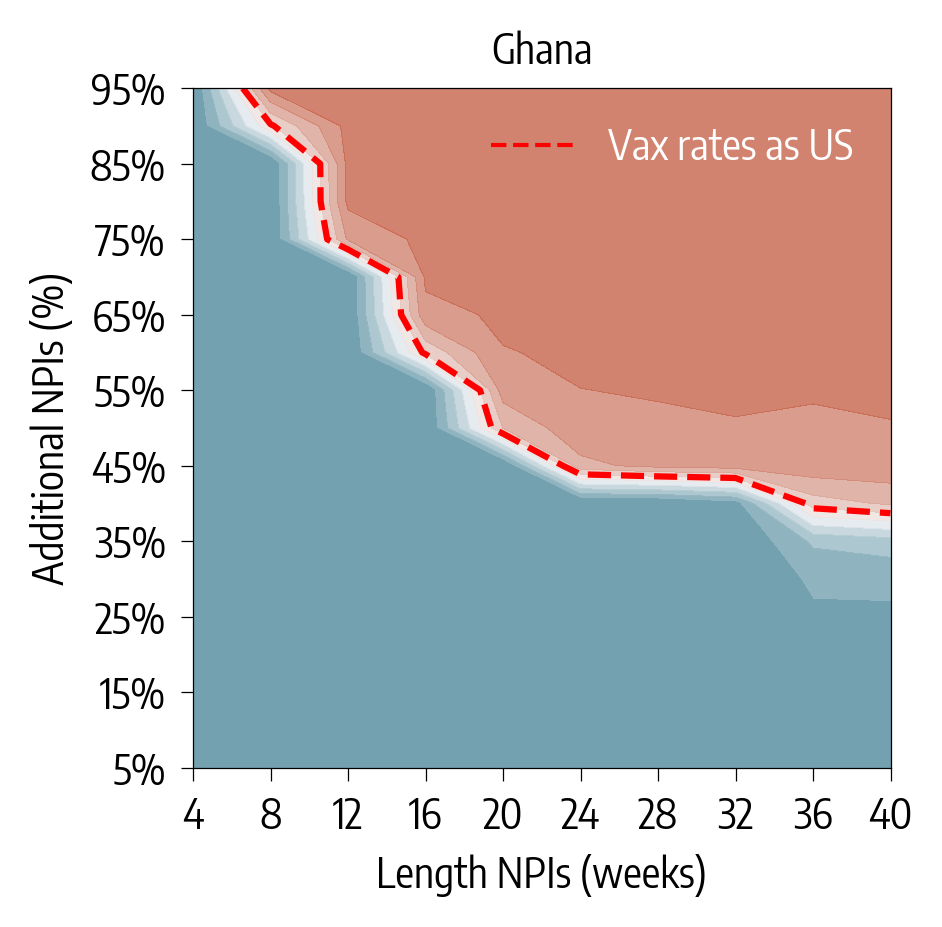

In [8]:
fig, ax = plt.subplots(dpi=300, figsize=(3,3))
plot_contourf(ax, "Ghana")
plt.savefig("./img/ghana.pdf", bbox_inches="tight")